In [1]:
# import dependencies
import pandas as pd
import json
import requests
from googleapiclient.discovery import build
from config import api_key
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS

In [2]:
youtube = build('youtube', 'v3', developerKey=api_key)
analyzer = SentimentIntensityAnalyzer()

In [3]:
# import data
df = pd.read_csv('video_df_cleaned.csv')

In [4]:
# get rows where comment count is greater than 0
comment_df = df[df['video_comment_count'] > 0]
comment_df = comment_df.reset_index(drop=True)

In [5]:
def get_comments(video_id):
    try:
        results = youtube.commentThreads().list(
            part="snippet",
            videoId=video_id,
            textFormat="plainText",
            maxResults=20
        ).execute()

        comments = []
        for item in results["items"]:
            comment = item["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
            comments.append(comment)
        return comments
    except:
        return None



In [6]:
def sentiment_analyzer_scores(test):
    score = analyzer.polarity_scores(test)
    # get compound score
    return score['compound']

In [7]:
for video in comment_df['video_id']:
    comments = get_comments(video)
    if comments is not None:
        comment_df.loc[comment_df['video_id'] == video, 'sentiment'] = sentiment_analyzer_scores(comments)

            


In [8]:
comment_df

,video_id,channel_id,video_title,video_title_clean,published,video_views,video_madeforkids,video_likes,video_comment_count,video_length,video_description,video_tags,sentiment
0,8XR9OzAeDqQ,UC-lHJZR3Gqxm24_Vd_AJ5Yw,too big waves for me..,too big waves for me,2022-10-31 11:00:05+00:00,796136,False,67178,4601,14:40,🧎#Subscribe🧎\n\nStock Up On ➡️🥤Gfuel (affiliat...,"['pewdiepie', 'pewds', 'pewdie']",-0.2279
1,LzCA5zHayyk,UC-lHJZR3Gqxm24_Vd_AJ5Yw,She fell for it!,She fell for it,2022-10-24 20:25:38+00:00,1709859,False,107094,9108,32:21,#AD- Pick up the Mertz-designed Collector's bo...,"['pewdiepie', 'pewds', 'pewdie']",0.9500
2,UhjjjqmGAkI,UC-lHJZR3Gqxm24_Vd_AJ5Yw,Does this mean Im cursed now?,Does this mean Im cursed now,2022-10-17 12:45:01+00:00,1527432,False,103944,7784,22:31,#AD - My new browser background is live on Ope...,"['pewdiepie', 'pewds', 'pewdie']",0.9973
3,cLFJjMokld8,UC-lHJZR3Gqxm24_Vd_AJ5Yw,I took my car off road ... (Oops),I took my car off road Oops,2022-10-15 13:10:55+00:00,1614282,False,133521,8697,9:59,Thank you for letting us w̶r̶e̶c̶k̶ borrow som...,"['pewdiepie', 'pewds', 'pewdie']",0.9949
4,vwfQq9IA8TA,UC-lHJZR3Gqxm24_Vd_AJ5Yw,I bought every single Gacha Pod.... (Collab wi...,I bought every single Gacha Pod Collab with Pe...,2022-10-07 13:46:07+00:00,2571233,False,156889,9793,39:21,#AD - My new browser background is live on Ope...,"['pewdiepie', 'pewds', 'pewdie']",0.9908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4975,q-LtofpGSEs,UCchgIh8Tc4sTmBfnMQ5pDdg,"Mykonos, Greece: World-Famous Beaches - Rick S...",Mykonos Greece WorldFamous Beaches Rick Steves...,2021-06-09 15:00:33+00:00,95956,False,1192,87,1:44,Watch the full episode: https://youtu.be/HZOuD...,"['Rick Steves', 'Rick Steves Europe', 'Europe ...",0.9948
4976,QgaGuNenKJc,UCchgIh8Tc4sTmBfnMQ5pDdg,"""Rick Steves' Europe"" Season 11 Outtakes: The ...",Rick Steves Europe Season 11 Outtakes The Bloo...,2021-05-27 22:58:12+00:00,73583,False,1857,215,5:45,"Enjoy five minutes of goofy, giddy travel mome...","['Rick Steves', 'Rick Steves Europe', 'Europe ...",0.9929
4977,cmQFp541FIM,UCchgIh8Tc4sTmBfnMQ5pDdg,Why We Travel: To Appreciate Art and Culture -...,Why We Travel To Appreciate Art and Culture Ri...,2021-05-26 15:00:15+00:00,49268,False,1417,84,6:48,"Part 3 of 5, this clip celebrates how travel c...","['Rick Steves', 'Rick Steves Europe', 'Europe ...",0.9990
4978,x4JkC3QOMSc,UCchgIh8Tc4sTmBfnMQ5pDdg,"Chamonix, France: Thin-Air Thrills at the Aigu...",Chamonix France ThinAir Thrills at the Aiguill...,2021-05-12 15:00:25+00:00,145745,False,3024,121,4:28,Watch the full episode: https://youtu.be/7HXrk...,"['Rick Steves', 'Rick Steves Europe', 'Europe ...",0.9968


In [9]:
# export to csv
comment_df.to_csv('comment_df.csv', index=False)


In [12]:
# import the all_channels.csv file
channels_df = pd.read_csv('all_channels_df.csv')

# rename the column to match the comment_df
channels_df = channels_df.rename(columns={'id': 'channel_id'})

# merge the two dataframes
merged_df = pd.merge(channels_df, comment_df, on='channel_id')

In [45]:
merged_df.to_csv('merged_df.csv', index=False)

In [15]:
merged_df.columns

Index(['channel_id', 'title', 'description', 'customUrl', 'publishedAt',
       'thumbnails.default.url', 'defaultLanguage', 'viewCount',
       'subscriberCount', 'videoCount', 'topicIds', 'topicCategories',
       'relatedPlaylists.uploads', 'category_title', 'video_id', 'video_title',
       'video_title_clean', 'published', 'video_views', 'video_madeforkids',
       'video_likes', 'video_comment_count', 'video_length',
       'video_description', 'video_tags', 'sentiment'],
      dtype='object')

<AxesSubplot:title={'center':'sentiment'}, xlabel='category_title'>

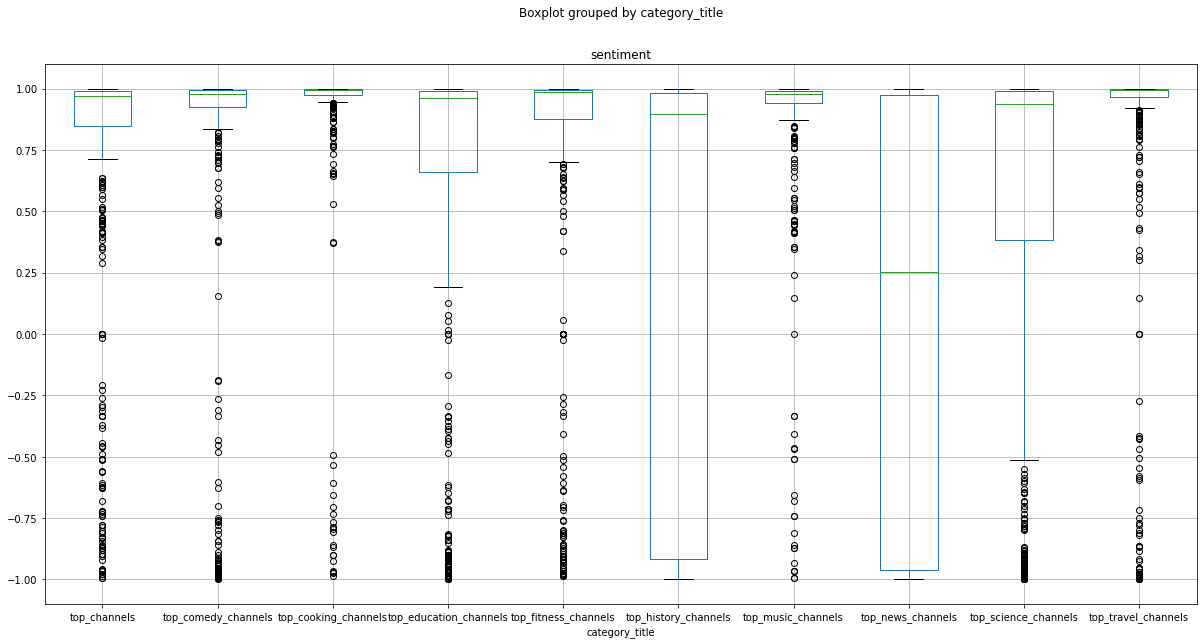

In [23]:
# plot sentiment scores grouped by category with white background
merged_df.boxplot(column='sentiment', by='category_title', figsize=(20, 10))



In [37]:
# use plotly to create a box plot of sentiment scores grouped by category
import plotly.express as px
fig = px.box(merged_df, x='category_title', y='sentiment', title='Sentiment Scores by Category')
# make the chart red
fig.update_traces(marker_color='rgb(220, 0, 0)')



fig.show()


In [44]:
# use plotly to plot the sentiment scores where category is top_channels by channel customUrl
import plotly.express as px
fig = px.scatter(merged_df, x='customUrl', y='sentiment', color='category_title', title='Sentiment Scores by Channel')
# increase height of chart
fig.update_layout(height=1000)

fig.show()
